<a href="https://colab.research.google.com/github/Nazmul71717/Nazmul71717-Home-cleaning-service-analysis./blob/main/Home_cleaning_service_analaisis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv ('Home cleaning service.csv')
print(df)

           Date           Product Region Customer_Type  Quantity    Price  \
0    2024-09-30       Promotional  North      Business         3  2396.28   
1    2024-05-14  Corporate Videos  South    Individual         7  3898.50   
2    2024-05-21          Weddings   East      Business         3  4485.47   
3    2024-06-27       Promotional   West    Individual        10  4390.22   
4    2024-06-01  Corporate Videos  North    Individual         1  2480.17   
..          ...               ...    ...           ...       ...      ...   
995  2024-08-20  Corporate Videos  South      Business        10  1029.06   
996  2024-01-25          Weddings  South      Business         9  4674.79   
997  2024-06-27          Weddings  North    Individual         3  4443.01   
998  2024-03-26  Corporate Videos   East      Business         5  2535.23   
999  2024-06-16       Promotional  South    Individual         1  2035.21   

     Discount   Revenue  
0        0.16   6038.63  
1        0.24  20740.02

In [ ]:
output = []
output.append("Exploratory Data Analysis of Home Cleaning Service \n")
output.append("========================================\n")

In [ ]:
print(df.head())
output.append(f"First few rows: \n{df.head()}\n")

         Date           Product Region Customer_Type  Quantity    Price  \
0  2024-09-30       Promotional  North      Business         3  2396.28   
1  2024-05-14  Corporate Videos  South    Individual         7  3898.50   
2  2024-05-21          Weddings   East      Business         3  4485.47   
3  2024-06-27       Promotional   West    Individual        10  4390.22   
4  2024-06-01  Corporate Videos  North    Individual         1  2480.17   

   Discount   Revenue  
0      0.16   6038.63  
1      0.24  20740.02  
2      0.26   9957.74  
3      0.16  36877.85  
4      0.04   2380.96  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [ ]:
df.describe()
output.append(f"First few rows: \n{df.describe()}\n")

In [ ]:
output.append("Data cleaning result:\n")
missing_value = df.isnull().sum()
print(missing_value)
output.append(f"Missing value: \n{missing_value}\n")
df.dropna(inplace=True)
df['Date']= pd.to_datetime(df['Date'])


Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [ ]:
duplicates = df.duplicated().sum()
output.append (f"Number of Duplicates droped: {duplicates}/n")
df.drop_duplicates(inplace=True)

In [ ]:
total_revenue = df['Revenue'].sum()
output.append(f"total revenue : ${total_revenue} \n")
print(f'total revenue : ${total_revenue}')



total revenue : $12938660.510000002


In [ ]:
average_price_per_service = df.groupby('Customer_Type')['Price'].mean()
output.append("Average price per cumtomar type :\n")
output.append(f"{average_price_per_service}\n")
print(average_price_per_service)

Customer_Type
Business      2802.916660
Individual    2713.895393
Name: Price, dtype: float64


In [ ]:
total_services_by_region = df['Region'].value_counts()
output.append("Total services provided by Region ;\n")
output.append(f'{total_services_by_region}\n')
print(total_services_by_region)

Region
South    276
North    250
East     247
West     227
Name: count, dtype: int64


In [ ]:
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("total revenue by region :\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)

Region
East     668402.84
North    701053.90
South    753188.05
West     633891.79
Name: Price, dtype: float64


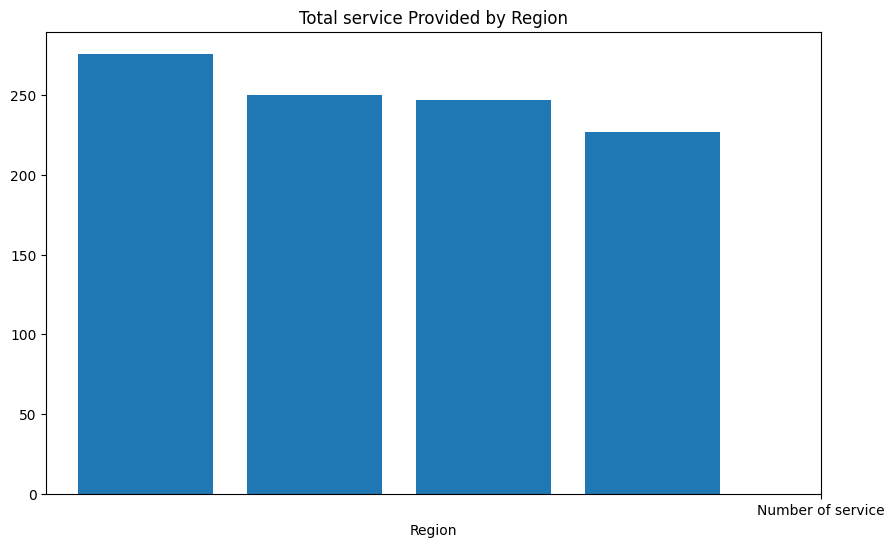

In [ ]:
# visualigation
# bar
plt.figure(figsize=(10,6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title('Total service Provided by Region')
plt.xlabel('Region')
plt.xticks('Number of service')
plt.savefig('total service provided.png') #save image
plt.show()

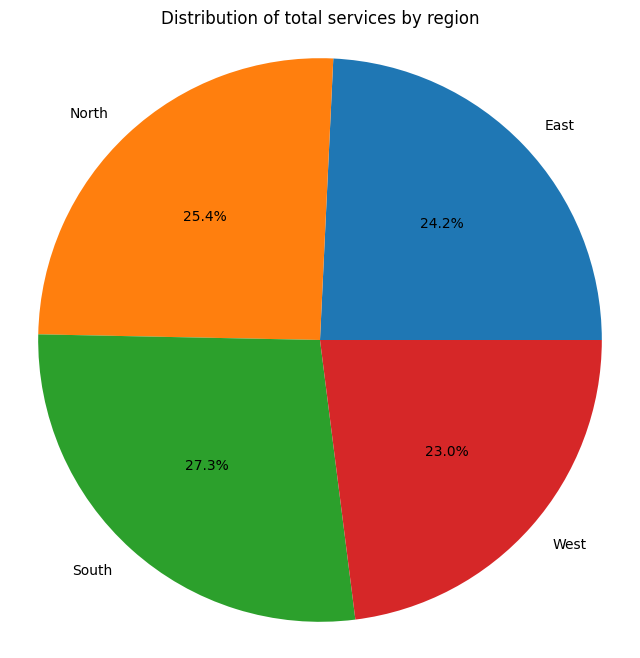

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%')
plt.title('Distribution of total services by region')
plt.axis('equal')
plt.savefig('service_distributation_by_region.png')
plt.show()

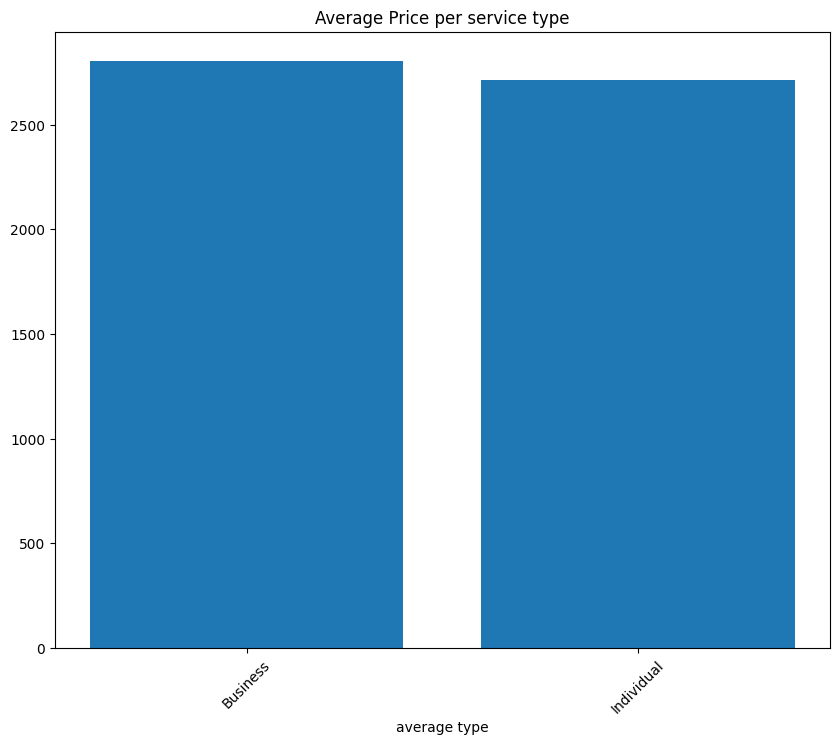

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Average Price per service type')
plt.xlabel('service type')
plt.xlabel('average type')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')
plt.show()

In [ ]:
# save output to a text file
with open('analysis_output.txt','w' )as f:
  f.writelines(output)